#### **1. Importando Pacote e módulos necessários**

Instalação dos módulos necessários.

In [ ]:
%pip install seaborn
%pip install scikit-learn
%pip install matplotlib
%pip install aisp

In [ ]:
# Importando a seleção negativa.
from aisp.nsa import RNSA

# Importando os demais pacotes.
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#### 2. Gerando bolhas de dados para as classe aleatoriamente.

Utilizando a função make_blobs, são gerados dois conjuntos de dados em forma de bolhas, no intervalo entre 0 e 1, representando cada classe x e y. Em seguida, esses dados são separados em conjuntos de teste e treinamento.

In [2]:
# Gerando as amostras e saídas para o treinamento.
samples, output = make_blobs(
    n_samples=500,
    cluster_std=0.07,
    center_box=(0.0, 1.0),
    centers=[[0.25, 0.75], [0.75, 0.25]],
    random_state=1234,
)
# Separando dados para treinamento e teste.
train_x, test_x, train_y, test_y = train_test_split(samples, output, test_size=0.2)

#### 3. Testando o modelo ``default-NSA``:
Inicia o modelo com 500 detectores, cada um com um raio de 0.06. Em seguida, apresenta o resultado da acurácia da previsão.

In [3]:
# Iniciando a classe.
nsa = RNSA(N=500, r=0.05, r_s=0.03, seed=1234)
# Efetuando o treinamento:
nsa.fit(X=train_x, y=train_y)
# Efetuando a previsão::
prev = nsa.predict(X=test_x)
# Mostrando a acurácia das previsões para os dados reais.
print(f"A acurácia é {accuracy_score(prev, test_y)}")
print(classification_report(test_y, prev))

✔ Non-self detectors for classes (0, 1) successfully generated:  ┇██████████┇ 1000/1000 detectors


A acurácia é 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        55

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



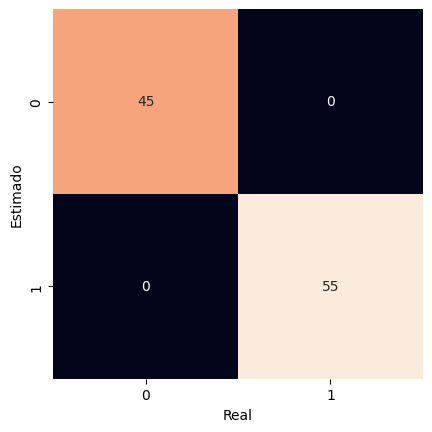

In [4]:
# Gerando a matriz de confusão e plotando de forma gráfica.
mat = confusion_matrix(y_true=test_y, y_pred=prev)
sns.heatmap(
    mat.T,
    square=True,
    annot=True,
    fmt="d",
    cbar=False,
    xticklabels=nsa.classes,
    yticklabels=nsa.classes,
)
plt.xlabel("Real")
plt.ylabel("Estimado")
plt.show()

#### 4. Plotando os detectores gerados com as amostras de treinamento.

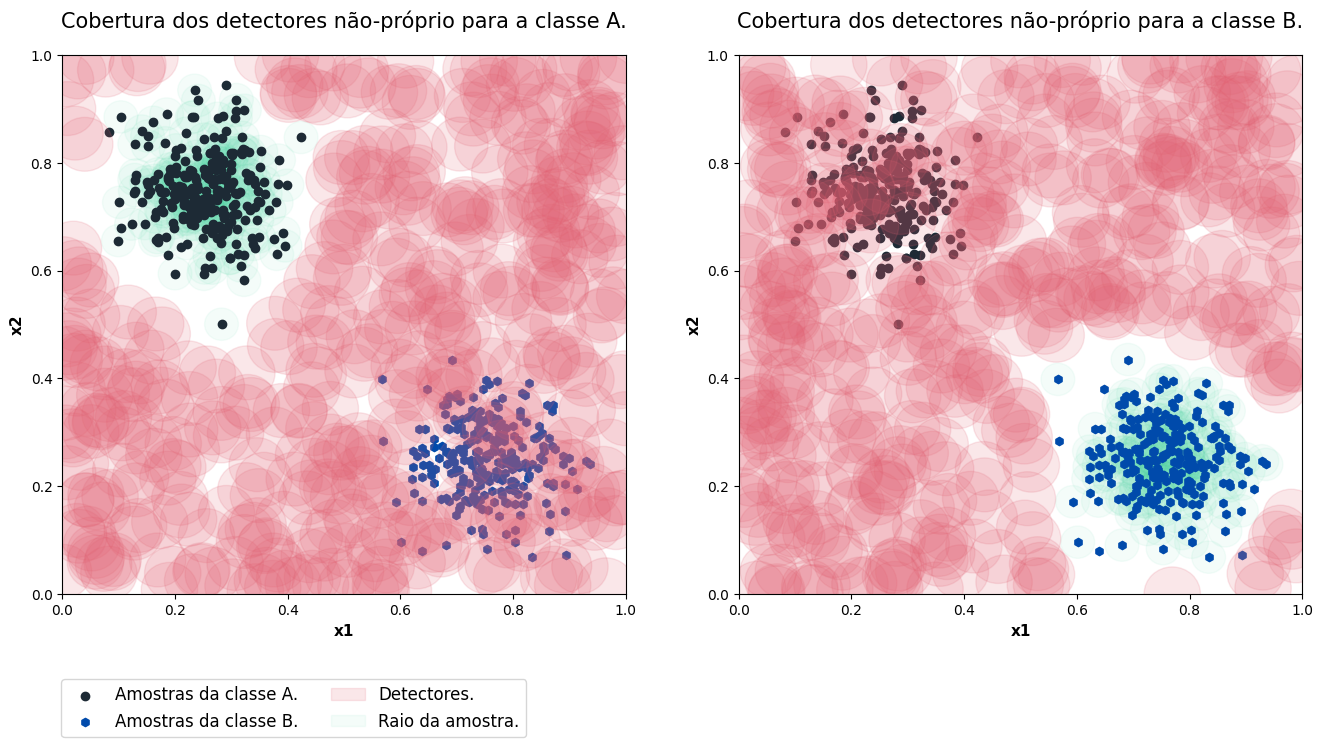

In [ ]:
def plot_detectores(samples, train_x, nsa, rs):
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16, 7))
    labels = ['A', 'B']
    classesIndex = np.array((np.nonzero(output == 0)[0] ,np.nonzero(output == 1)[0]))

    for i in range(2):
        ax[i].axis([0, 1,0,1])
        
        if rs > 0 and train_x is not None:
            Index = np.nonzero(train_y == i)[0]
            for x in train_x[Index]:
                ax[i].add_patch(plt.Circle((x[0], x[1]), color='#34d399', radius=(rs), alpha=0.05, label='Raio da amostra.'))
        
        ax[i].scatter(samples[classesIndex[0], 0], samples[classesIndex[0], 1], label='Amostras da classe A.', color='#1d2a35')
        ax[i].scatter(samples[classesIndex[1], 0], samples[classesIndex[1], 1], label='Amostras da classe B.', color='#004aab', marker='h')
        ax[i].set_title(f'Cobertura dos detectores não-próprio para a classe {labels[i]}.', fontsize=15, pad=20)
        ax[i].set_xlabel('x1', fontweight='bold', fontsize=11)
        ax[i].set_ylabel('x2', fontweight='bold', fontsize=11)
        
        for k in range(len(nsa.detectors[i])):
            det = nsa.detectors[i][k]
            r = det.radius if det.radius is not None else nsa.r
            ax[i].add_patch(plt.Circle((det.position[0], det.position[1]), color='#e25f71', radius=(r), alpha=0.15, label='Detectores.'))

    handles, labels = [], []
    for a in ax:
        for h, l in zip(*a.get_legend_handles_labels()):
            if l not in labels:
                handles.append(h)
                labels.append(l)
    
    handles_sorted, labels_sorted = zip(*sorted(zip(handles, labels), key=lambda x: x[1]))
    
    if rs > 0:
        fig.legend(handles_sorted, labels_sorted, bbox_to_anchor=(0.42, 0), ncol=2, fontsize='large')
    else:
        fig.legend(handles_sorted[:-1], labels_sorted[:-1], bbox_to_anchor=(0.48, 0), ncol=2, fontsize='large')

    plt.show()

plot_detectores(samples, train_x, nsa, 0.03)

#### 5. Testando o modelo ``V-detector``:
Inicia o modelo com 50 detectores, onde o raio mínimo é de 0.05 e o raio próprio das amostras é de 0.04. Em seguida, mostra o resultado da acurácia da previsão.

In [6]:
# Iniciando a classe.
nsa = RNSA(N=50, r=0.05, algorithm="V-detector", r_s=0.03, seed=1234)
# Efetuando o treinamento:
nsa.fit(X=train_x, y=train_y)
# Efetuando a previsão::
prev = nsa.predict(X=test_x)
# Mostrando a acurácia das previsões para os dados reais.
print(f"A acurácia é {accuracy_score(prev, test_y)}")
print(classification_report(test_y, prev))

✔ Non-self detectors for classes (0, 1) successfully generated:  ┇██████████┇ 100/100 detectors


A acurácia é 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        55

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



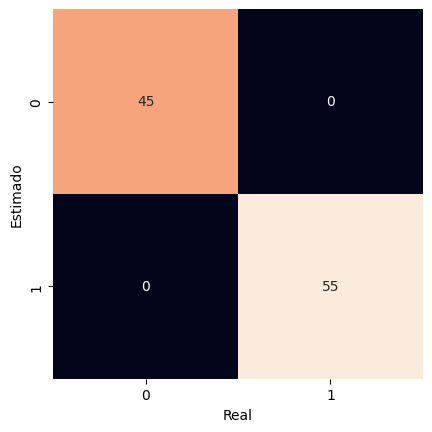

In [7]:
# Gerando a matriz de confusão e plotando de forma gráfica.
mat = confusion_matrix(y_true=test_y, y_pred=prev)
sns.heatmap(
    mat.T,
    square=True,
    annot=True,
    fmt="d",
    cbar=False,
    xticklabels=nsa.classes,
    yticklabels=nsa.classes,
)
plt.xlabel("Real")
plt.ylabel("Estimado")
plt.show()

#### 6. Plotando os detectores gerados com as amostras de treinamento.

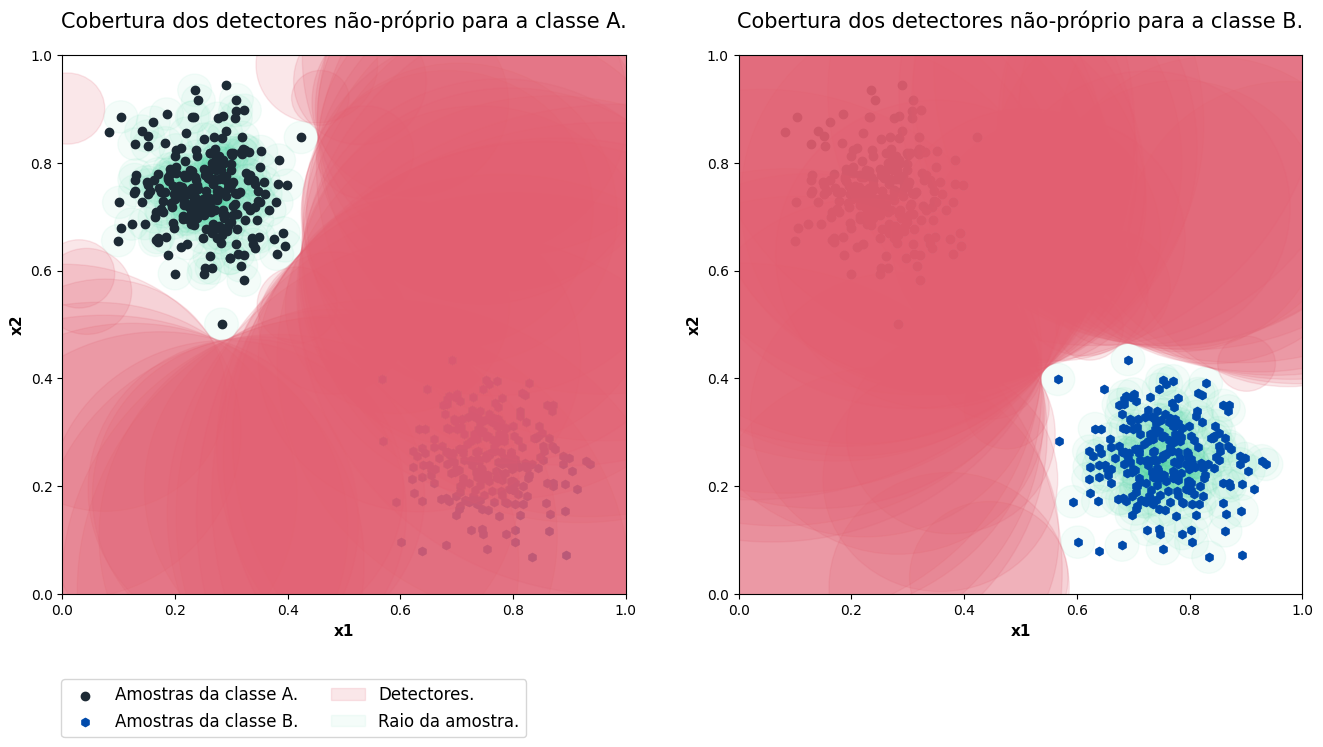

In [8]:
plot_detectores(samples, train_x, nsa, 0.03)